## Explanation of each variables (source: <a href='hhtps://www.google.com' target='blank'>Kaggle<a> )    
        

<b>customerID</b> : Customer ID   
<b>gender</b> : Whether the customer is a male or a female   
<b>SeniorCitizen</b> : Whether the customer is a senior citizen or not (1, 0)   
<b>Partner</b> : Whether the customer has a partner or not (Yes, No)   
<b>Dependents</b> : Whether the customer has dependents or not (Yes, No)   
<b>tenure</b> : Number of months the customer has stayed with the company  
<b>PhoneService</b> : Whether the customer has a phone service or not (Yes, No)   
<b>MultipleLines</b> : Whether the customer has multiple lines or not (Yes, No, No phone service)   
<b>InternetService</b> : Customer’s internet service provider (DSL, Fiber optic, No)   
<b>OnlineSecurity</b> : Whether the customer has online security or not (Yes, No, No internet service)   
<b>OnlineBackup</b> : Whether the customer has online backup or not (Yes, No, No internet service)   
<b>DeviceProtection</b> : Whether the customer has device protection or not (Yes, No, No internet service)   
<b>TechSupport</b> : Whether the customer has tech support or not (Yes, No, No internet service)   
<b>StreamingTV</b> : Whether the customer has streaming TV or not (Yes, No, No internet service)   
<b>StreamingMovies</b> : Whether the customer has streaming movies or not (Yes, No, No internet service)   
<b>Contract</b> : The contract term of the customer (Month-to-month, One year, Two year)   
<b>PaperlessBilling</b> : Whether the customer has paperless billing or not (Yes, No)   
<b>PaymentMethod</b> : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))   
<b>MonthlyCharges</b> : The amount charged to the customer monthly   
<b>TotalCharges</b> : The total amount charged to the customer   

### Churn : Whether the customer churned or not (Yes or No)

<hr>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_daa3fdecc9114f73aa1d261ae2c7a7c8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-lKj5CIuFIbV0KgZonhckasZN0q1UbLzWfFqFVcViSnP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_daa3fdecc9114f73aa1d261ae2c7a7c8.get_object(Bucket='customerchurnanalysis-donotdelete-pr-botz4onexmj0fd',Key='datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [5]:
df['TotalCharges'].isnull().sum()

11

In [6]:
df.dropna(axis=0, inplace=True, subset=['TotalCharges'])

In [7]:
df.shape

(7032, 21)

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
print('Churn quantity in the dataset')
df['Churn'].value_counts().to_frame()

Churn quantity in the dataset


,Churn
No,5163
Yes,1869


In [34]:
def plot_annotation(y_axis, ax, weight='bold', color='white', fontsize=14, figname='default'):
    total = len(df[y_axis])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width()/2 # + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), clip_on=True, weight=weight, color=color, fontsize=fontsize)

    plt.savefig(figname)

In [55]:
def plot_bar(y_axis,data, hue = None ,title=None, figsize=(7,5) , weight='bold', color='white', fontsize=14, figname='default' ):
    plt.style.use('ggplot')
    sns.set(style="ticks", color_codes=True)
    fig, axes = plt.subplots(figsize = figsize)
    ax = sns.countplot(y=y_axis, data=data, hue=hue)
    ax.set_title(title)
    plot_annotation(y_axis, ax, weight, color, fontsize, figname)

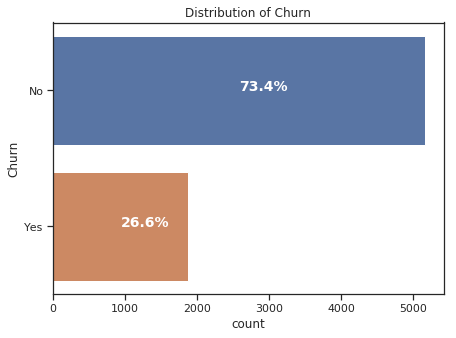

In [62]:
plot_bar('Churn',df,None, 'Distribution of Churn', (7,5),'bold', 'white', 14, 'dist_churn.png')

In [12]:
services = df.columns[6:15].to_list()
services_1 = df.columns[6:8].to_list() + df.columns[9:15].to_list()
type(services_1)

list

In [13]:
for i in services_1:
    df[i]  = df[i].replace({'No internet service' : 'No'})
    df[i]  = df[i].replace({'No phone service' : 'No'})

In [14]:
df_all = [df[df[i] == 'Yes'] for i in services_1] + [df[df['InternetService']!='No']]

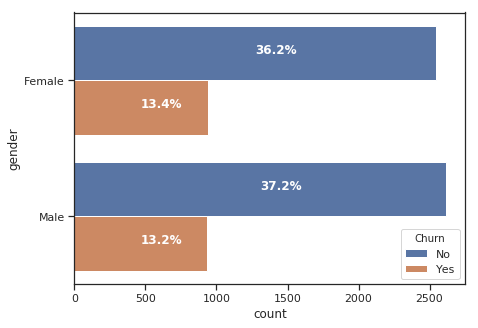

In [60]:
plot_bar('gender',df,'Churn',None, (7,5),'bold', 'white', 12, 'dist_churn_1.png')

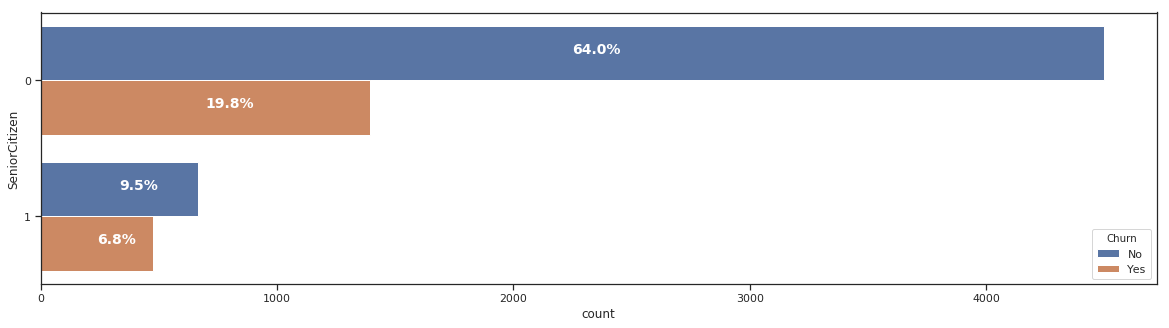

In [67]:
plot_bar('SeniorCitizen',df,'Churn',None, (20,5),'bold', 'white', 14, 'dist_churn_2.png')

# plt.style.use('ggplot')
# sns.set(style="ticks", color_codes=True)

# fig, axes = plt.subplots(nrows = 1,ncols = 1
#                          ,figsize = (5,5))

# ax = sns.countplot(y = "SeniorCitizen", hue = 'Churn', data = df)

# plot_annotation('SeniorCitizen', ax, 'normal', 'black', 12, 'dist_churn_2.png')

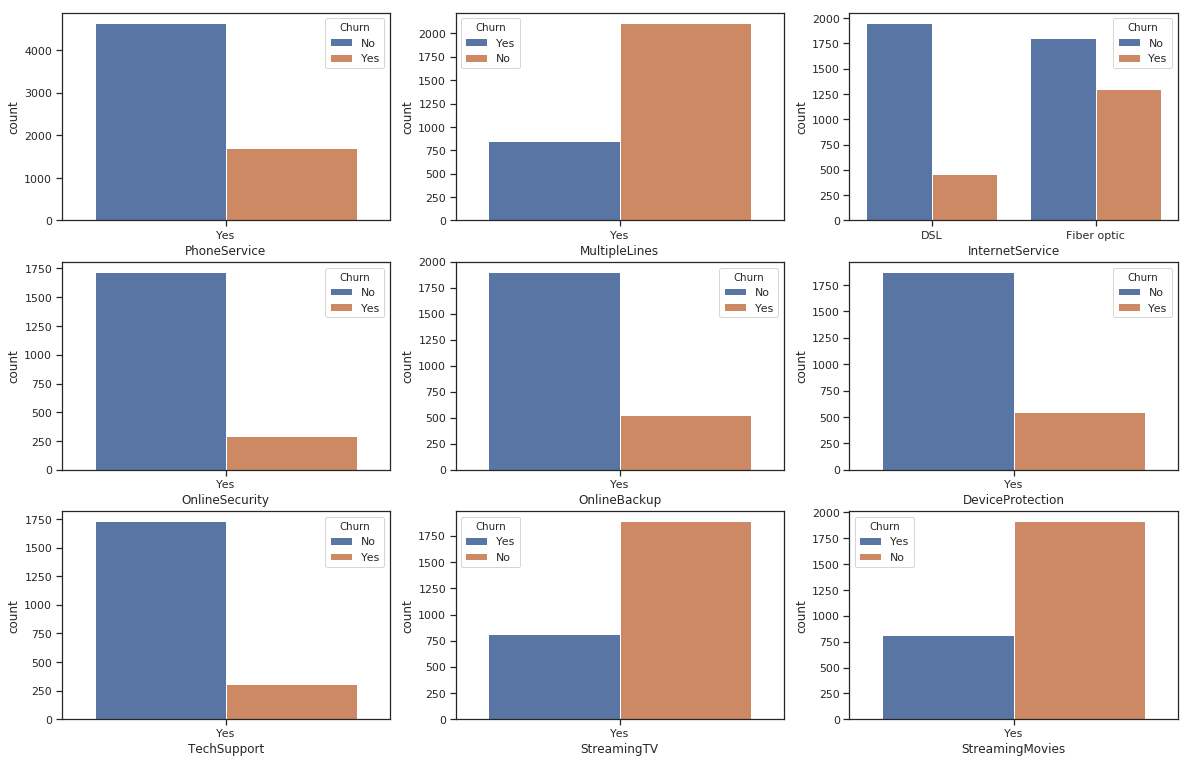

In [71]:
plt.style.use('ggplot')
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 3,ncols = 3
                         ,figsize = (20,13))

sns.countplot(x = "PhoneService", hue = 'Churn',data=df[df['PhoneService']=='Yes'],ax=axes[0][0]) #data = df_all[0], ax=axes[0][0])
sns.countplot(x = "MultipleLines", hue = 'Churn',data=df[df['MultipleLines']=='Yes'],ax=axes[0][1]) #data = df_all[1], ax=axes[0][1])
sns.countplot(x = "InternetService", hue = 'Churn',data = df_all[-1], ax=axes[0][2])
sns.countplot(x = "OnlineSecurity", hue = 'Churn', data = df_all[2], ax=axes[1][0])
sns.countplot(x = "OnlineBackup", hue = 'Churn', data = df_all[3], ax=axes[1][1])
sns.countplot(x = "DeviceProtection", hue = 'Churn', data = df_all[4], ax=axes[1][2])
sns.countplot(x = "TechSupport", hue = 'Churn', data = df_all[5], ax=axes[2][0])
sns.countplot(x = "StreamingTV", hue = 'Churn', data = df_all[6], ax=axes[2][1])
sns.countplot(x = "StreamingMovies", hue = 'Churn', data = df_all[7], ax=axes[2][2])

#sns.countplot(x = "Contract", data = df_1, ax=axes[4][0])
#sns.countplot(x = "PaperlessBilling", data = df_1, ax=axes[4][1])
#sns.countplot(x = "PaymentMethod", data = df_1, ax=axes[4][2])
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)

[Text(0, 0, 'Electronic check'),
 Text(0, 0, 'Mailed check'),
 Text(0, 0, 'Bank transfer (automatic)'),
 Text(0, 0, 'Credit card (automatic)')]

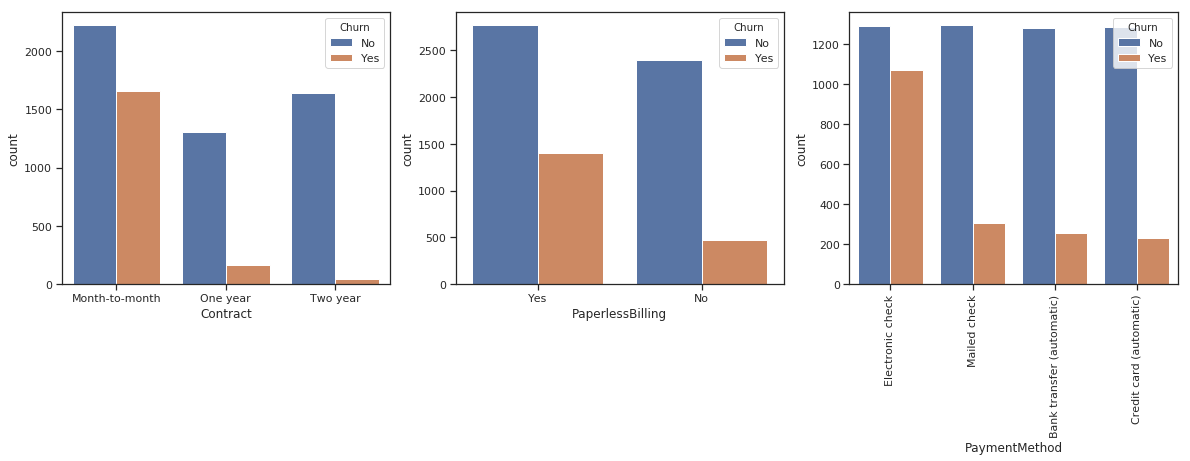

In [18]:
plt.style.use('ggplot')
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 1,ncols = 3
                         ,figsize = (20,5))

sns.countplot(x = "Contract", hue='Churn', data = df, ax=axes[0])
sns.countplot(x = "PaperlessBilling", hue='Churn', data = df, ax=axes[1])
ax = sns.countplot(x = "PaymentMethod", hue='Churn', data = df, ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [19]:
df_all [-1].head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


val_dict = dict(service_name=[],Total=[])
val= ['DeviceProtection','InternetService','OnlineSecurity']
for name in val:
    val = df_all[-][name].count()
    val_dict['service_name'].append(name)
    val_dict['Total'].append(val)
df_10 = pd.DataFrame(val_dict) 
df_10.plot(kind="bar",x="service_name",y="Total")

In [20]:
val_dict = dict(service_name=[],Total=[])

In [21]:

val_dict

{'service_name': [], 'Total': []}

In [22]:
val = df_all [-1]['OnlineSecurity'].count()
val_dict['service_name'].append('OnlineSecurity')
val_dict['Total'].append (val)
val_dict


{'service_name': ['OnlineSecurity'], 'Total': [5512]}

In [23]:
df_10 = pd.DataFrame(val_dict)

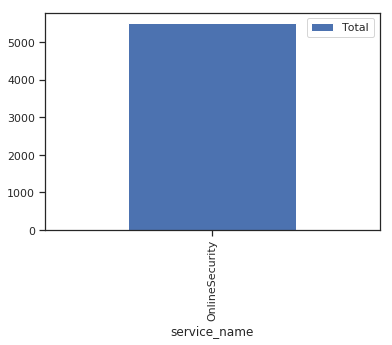

In [24]:
df_10.plot(kind="bar",x="service_name",y="Total")

In [25]:
set(df.InternetService)

{'DSL', 'Fiber optic', 'No'}

In [26]:
dict_map ={'DSL': 'Yes','Fiber optic': 'Yes'}

In [27]:
df.InternetService = df['InternetService'].replace(dict_map)

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
val_dict = dict(service_name=[],Total=[])
val= df.columns[6:15].to_list()#['DeviceProtection','InternetService','OnlineSecurity']
for name in val:
    val= df[df.Churn =='Yes'].copy()
    val =val[val[name] =='Yes'][name].count()
    
    val_dict['service_name'].append(name)
    val_dict['Total'].append(val)


In [30]:
print(val)


818


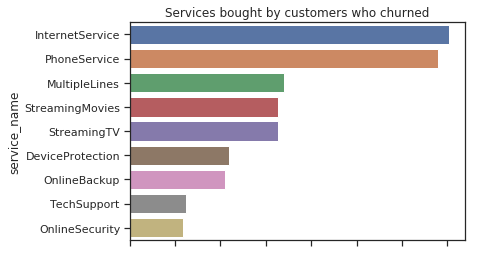

In [31]:
df_10 = pd.DataFrame(val_dict).sort_values(by=['Total'],ascending=False) 

#df_10.plot(kind="barh",x="service_name",y="Total")
ax = sns.barplot(y='service_name',data=df_10,x='Total')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Services bought by customers who churned')
ax.set_xlabel(None)
#ax.set_color('red')
plt.savefig('fig.jpeg')

Text(0.5, 0, '')

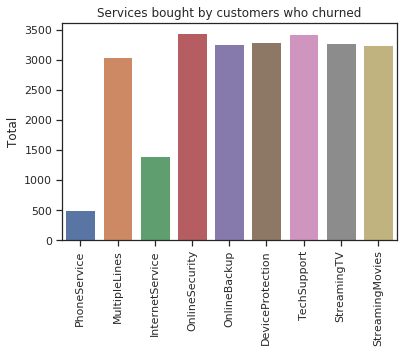

In [32]:
val_dict1 = dict(service_name=[],Total=[])
val1= df.columns[6:15].to_list()#['DeviceProtection','InternetService','OnlineSecurity']
for name in val1:
    val1= df[df.Churn =='No'].copy()
    val1 =val1[val1[name] =='No'][name].count()
    
    val_dict1['service_name'].append(name)
    val_dict1['Total'].append(val1)
    

    
df_11 = pd.DataFrame(val_dict1) 
#df_10.plot(kind="barh",x="service_name",y="Total")
ax = sns.barplot(x='service_name',data=df_11,y='Total')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Services bought by customers who churned')
ax.set_xlabel(None)

In [33]:
values = np.array([2,5,3,6,4,7,1])   
idx = np.array(list('abcdefg')) 
clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
sb.barplot(x=idx, y=values, palette=clrs) # color=clrs)

NameError: name 'sb' is not defined